In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='SimHei'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 导入数据，连接数据概况
# Revenue 门店销售额
# Reach 微信推送次数
# Loval_tv 本地电视广告投入
# Online 线上广告投入
# Instore 门店内海报陈列等投入
# Person 门店销售人员投入
# Event 门店促销事件（cobranding 品牌联合促销 holiday 节假日 special 门店特别促销 non-event 无促销活动）
f=open(r"C:\Users\60580\Documents\WeChat Files\wxid_lusqzqubjyl212\FileStorage\File\2023-04\baojie.csv")
df=pd.read_csv(f)
df.head()

,Unnamed: 0,revenue,reach,local_tv,online,instore,person,event
0,845,45860.28,2,31694.91,2115,3296,8,non_event
1,483,63588.23,2,35040.17,1826,2501,14,special
2,513,23272.69,4,30992.82,1851,2524,6,special
3,599,45911.23,2,29417.78,2437,3049,12,special
4,120,36644.23,2,35611.11,1122,1142,13,cobranding


In [4]:
# 数据预处理
df.drop(columns='Unnamed: 0',inplace=True)
df.head()
df.info
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()
df.drop_duplicates()
# 增加一列为总广告投入
df['total_input']=df['local_tv']+df['online']+df['instore']

array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'reach'}>,
        <AxesSubplot:title={'center':'local_tv'}>],
       [<AxesSubplot:title={'center':'online'}>,
        <AxesSubplot:title={'center':'instore'}>,
        <AxesSubplot:title={'center':'person'}>],
       [<AxesSubplot:title={'center':'total_input'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

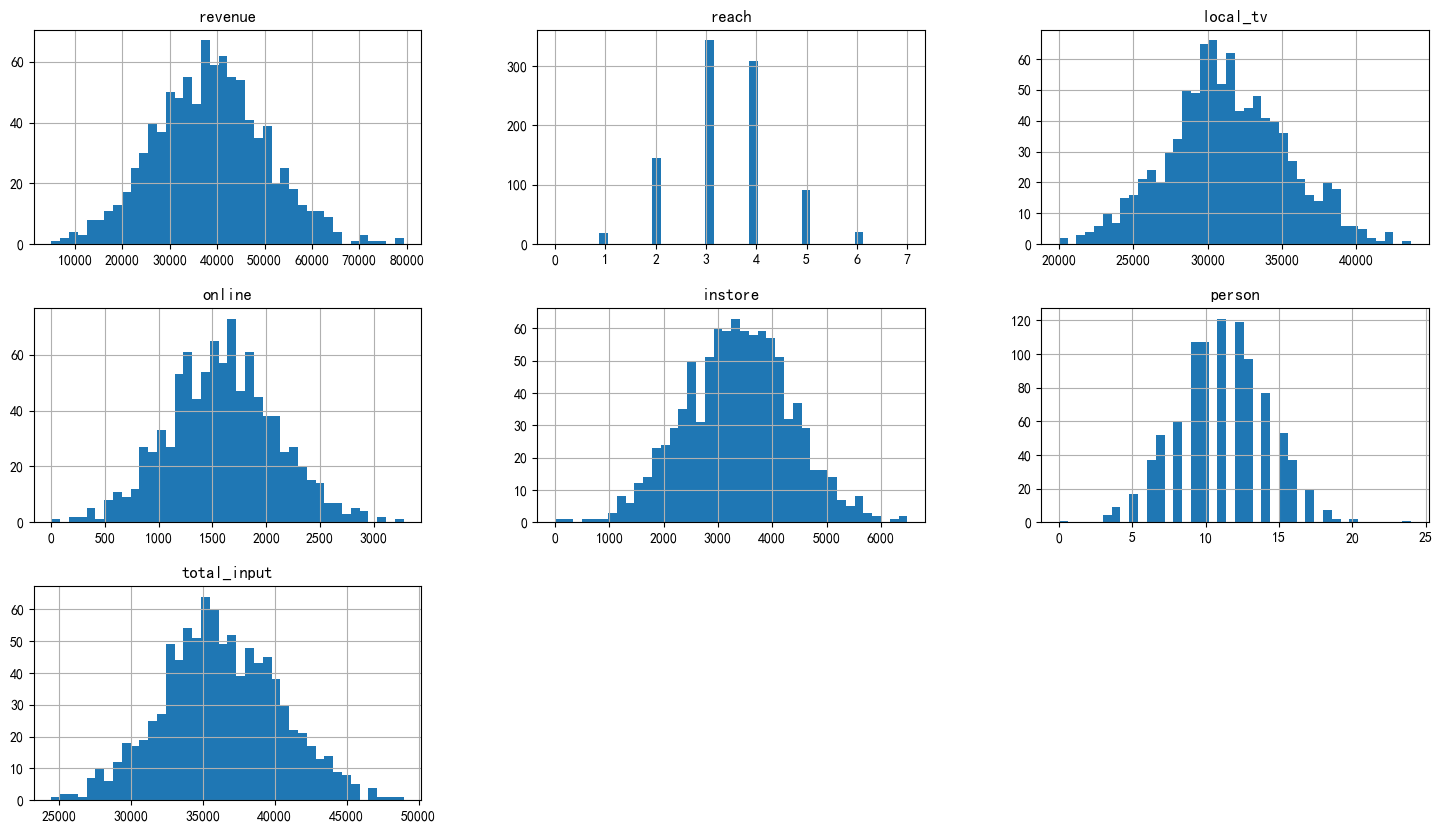

In [5]:
df.describe()
# 可视化数据的整体分布
df.hist(bins=40,figsize=(18,10)) # 由图可见每一列数据基本符合正态分布

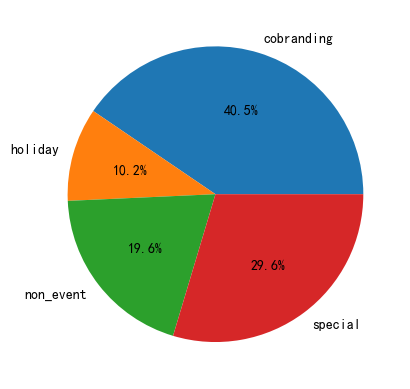

In [6]:
# 分析销售额与广告投入关系
# 分析各项活动与总广告投入关系
event_per=df.groupby('event')['total_input'].sum()
plt.pie(event_per.values,labels=event_per.index,autopct="%1.1f%%")
plt.show()

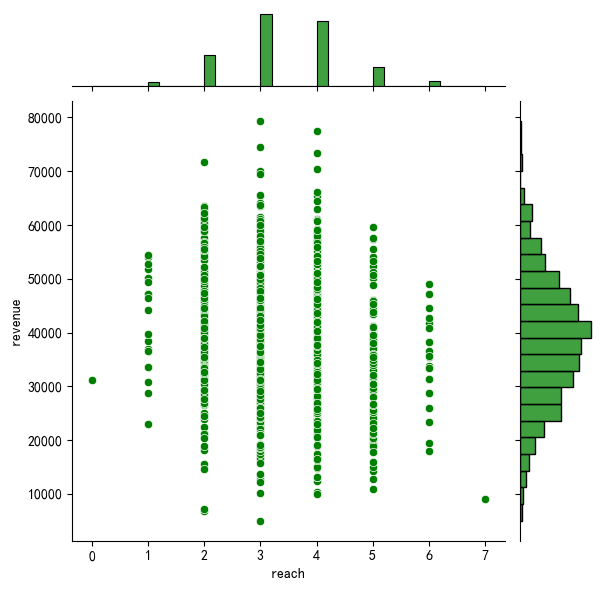

In [7]:
# 分析微信投送与销售额之间的关系
sns.jointplot(x='reach',y='revenue',data=df,color='green') # 由图可见，当微信投送次数集中于3-4次，销售额集中在30000-50000，微信投送次数为2-4次时，收益最高

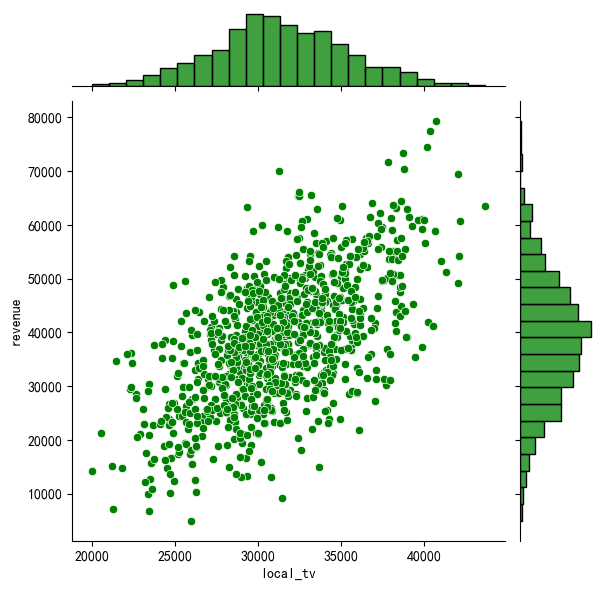

In [8]:
# 分析本地电视广告投入与销售额关系
sns.jointplot(x='local_tv',y='revenue',data=df,color='green') # 由图可见，本地电视广告投入基本与销售额成正比，本地电视广告投入集中于28000-32000之间

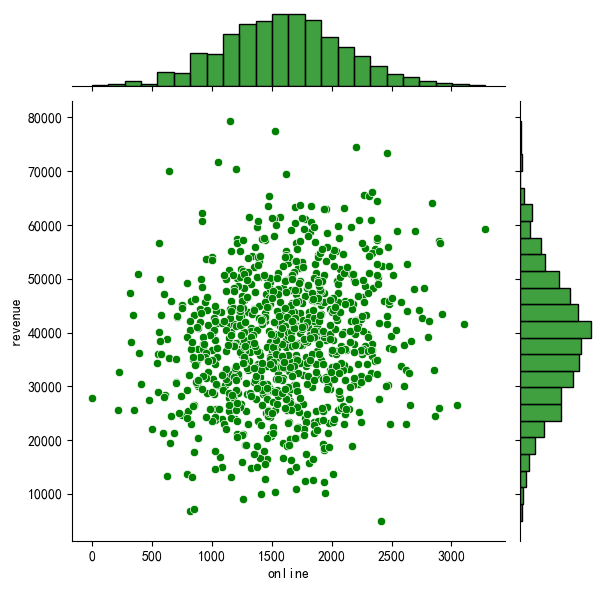

In [10]:
# 分析线上广告投入与销售额关系
sns.jointplot(x='online',y='revenue',data=df,color='green') # 由图可见，线上广告投入集中于800-2500

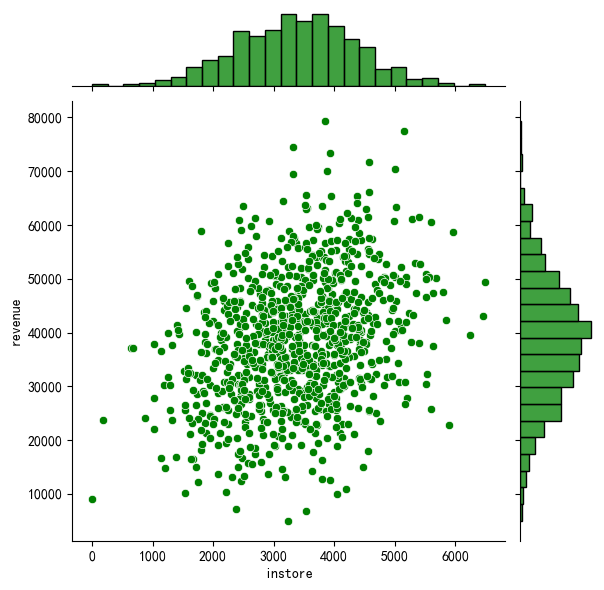

In [12]:
# 分析门店内海报陈列等投入与销售额关系
sns.jointplot(x='instore',y='revenue',data=df,color='green') # 由图可见，门店内海报陈列等投入集中于1500-5000,门店内海报陈列等投入为3000-5000时效果最佳

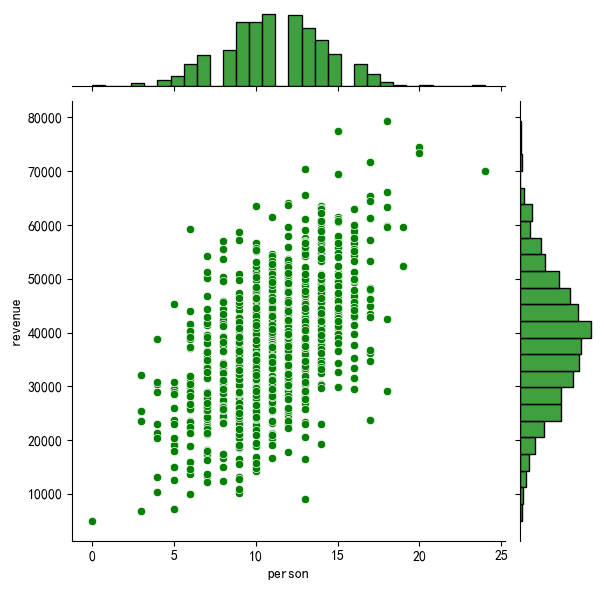

In [13]:
# 分析门店销售人员投入与销售额关系
sns.jointplot(x='person',y='revenue',data=df,color='green') # 由图可见，门店销售人员投入集中于8-14人,门店销售人员投入为14-18人时效果最佳

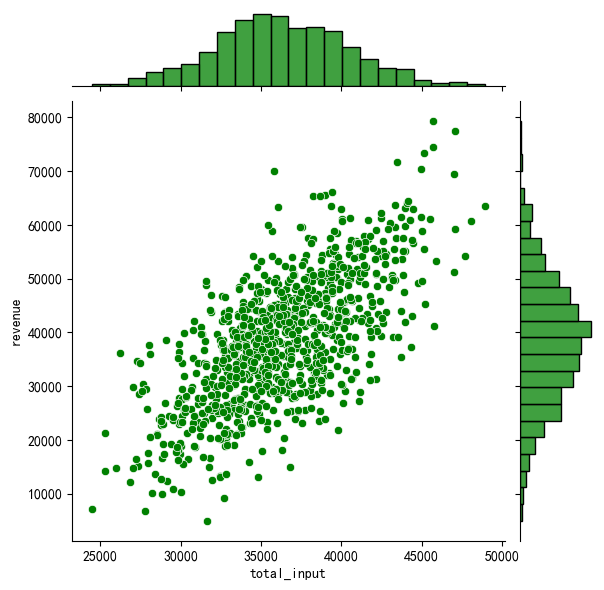

In [14]:
# 分析广告总投入费用与销售额关系
sns.jointplot(x='total_input',y='revenue',data=df,color='green') # 由图可见，广告总投入费用基本与销售额成正比

<AxesSubplot:>

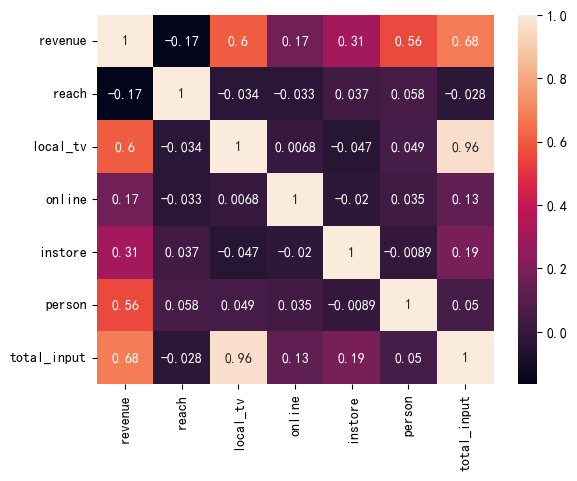

In [15]:
# 分析各个因素间的相关系数
corr=df.corr(method='pearson')
sns.heatmap(corr,annot=True) # 绘制热力图清楚看出各个因素间的关系，由图可以看出销售额与本地电视广告投入、门店销售人员投入间的相关关系较紧密，与微信投送次数相关关系为负

In [16]:
# 构建模型预测销售额
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=df.drop(columns=['revenue','total_input','event'])
Y=df['revenue']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=123)
model=LinearRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

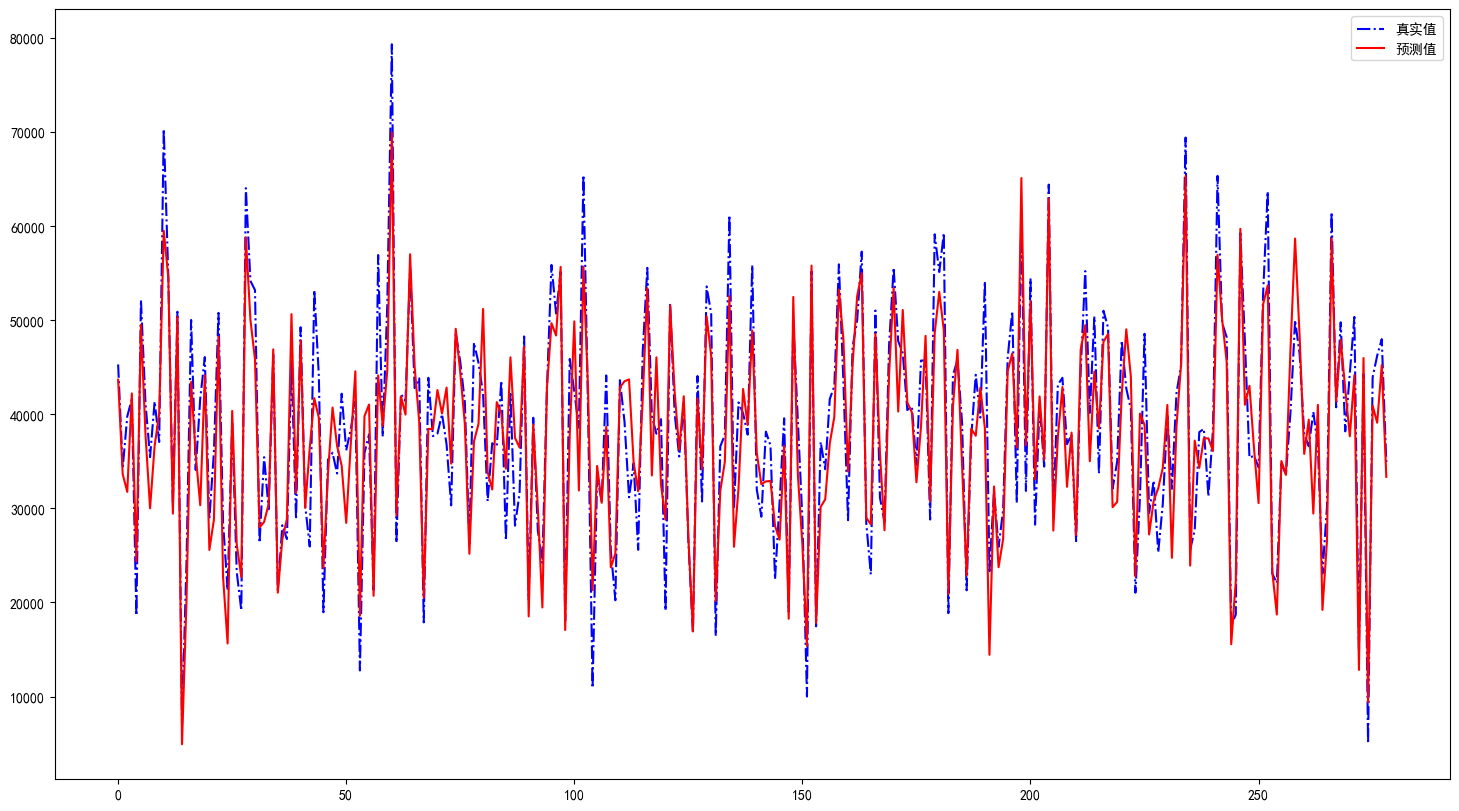

In [17]:
# 绘制真实值和预测值
plt.figure(figsize=(18,10))
shape=Y_test.shape[0]
plt.plot(range(shape),Y_test,color='blue',linestyle='-.')
plt.plot(range(shape),Y_pred,color='red',linestyle='-')
plt.legend(['真实值','预测值'])
plt.show()

In [18]:
# 评估模型预测精度为0.84
score=r2_score(Y_test,Y_pred)
print(f'预测模型精准度:{score: .2f}')


预测模型精准度: 0.84
